# 基于深度学习框架Pytorch transforms 方法进行数据的预处理
整个过程主要包括：缩放、裁剪、归一化、标准化几个基本步骤。


图像归一化是计算机视觉、模式识别等领域广泛使用的一种技术。所谓图像归一化, 就是通过一系列变换, 将待处理的原始图像转换成相应的唯一标准形式(该标准形式图像对平移、旋转、缩放等仿射变换具有不变特性)

基于矩的图像归一化过程包括 4 个步骤 即坐标中心化、x-shearing 归一化、缩放归一化和旋转归一化。


## Pytorch：transforms方法
1. 裁剪——Crop

中心裁剪：transforms.CenterCrop  
随机裁剪：transforms.RandomCrop  
随机长宽比裁剪：transforms.RandomResizedCrop  
上下左右中心裁剪：transforms.FiveCrop  
上下左右中心裁剪后翻转，transforms.TenCrop  

2. 翻转和旋转——Flip and Rotation

依概率p水平翻转：transforms.RandomHorizontalFlip(p=0.5)    
依概率p垂直翻转：transforms.RandomVerticalFlip(p=0.5)  
随机旋转：transforms.RandomRotation  

3. 图像变换

resize：transforms.Resize   
标准化：transforms.Normalize    
转为tensor，并归一化至[0-1]：transforms.ToTensor 
填充：transforms.Pad    
修改亮度、对比度和饱和度：transforms.ColorJitter    
转灰度图：transforms.Grayscale   
线性变换：transforms.LinearTransformation()   
仿射变换：transforms.RandomAffine   
依概率p转为灰度图：transforms.RandomGrayscale  
将数据转换为PILImage：transforms.ToPILImage  
transforms.Lambda：Apply a user-defined lambda as a transform.  

4. 对transforms操作，使数据增强更灵活

transforms.RandomChoice(transforms)， 从给定的一系列transforms中选一个进行操作  
transforms.RandomApply(transforms, p=0.5)，给一个transform加上概率，依概率进行操作  
transforms.RandomOrder，将transforms中的操作随机打乱  

# 导入库

In [1]:
import torch 
import torchvision
from torchvision import transforms
print("torch:", torch.__version__)
print("torchvision:", torchvision.__version__)

torch: 1.0.1
torchvision: 0.2.2


# 加载图片数据

input_image.shape: (750, 690)


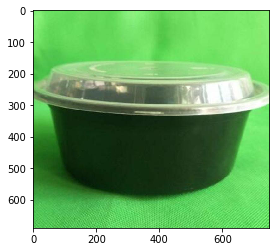

In [17]:
file_name = '../../data/refuse_data/train/0/img_10.jpg'

from PIL import Image
input_image = Image.open(file_name)
# 图片的尺寸
print("input_image.shape:", input_image.size)

#  可视化
import matplotlib.pyplot as plt 
%matplotlib inline
ax = plt.imshow(input_image)


## pytorch 数据预处理

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([3, 224, 224])
tensor([[[-0.3883, -0.3712, -0.3712,  ...,  0.0056,  0.0056,  0.0227],
         [-0.4054, -0.3883, -0.3712,  ...,  0.0227,  0.0056,  0.0398],
         [-0.3883, -0.4054, -0.4054,  ...,  0.0056,  0.0056,  0.0398],
         ...,
         [-0.7650, -0.7308, -0.7650,  ..., -0.4054, -0.3027, -0.2684],
         [-0.7822, -0.7650, -0.6965,  ..., -0.2171, -0.2856, -0.4226],
         [-0.7479, -0.8164, -0.7650,  ..., -0.3369, -0.5082, -0.3712]],

        [[ 1.7983,  1.7808,  1.7808,  ...,  2.0434,  2.0434,  2.0609],
         [ 1.7633,  1.7633,  1.7808,  ...,  2.0609,  2.0434,  2.0784],
         [ 1.7283,  1.7458,  1.7458,  ...,  2.0434,  2.0434,  2.0784],
         ...,
         [ 1.3957,  1.4132,  1.3957,  ...,  1.8508,  1.9559,  1.9909],
         [ 1.3431,  1.3431,  1.4132,  ...,  2.0434,  1.9734,  1.8333],
         [ 1.3606,  1.2906,  1.3431,  ...,  1.9209,  

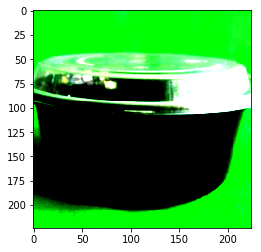

In [28]:
# 定义pytorch预处理的方法
preprocess = transforms.Compose([
    # 图像的缩放
    transforms.Resize((256,256)),
    # 中心裁剪
    transforms.CenterCrop(224),
    # 归一化 [0,1]
    transforms.ToTensor(),
    # 图像数据的标准化
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229,0.224,0.225]
    )
])


# 原始数据-预处理操作
input_tensor = preprocess(input_image)
# print(input_tensor.size) 
print(input_tensor.shape)
print(input_tensor)

## 可视化展示
input_tensor = input_tensor.permute(1,2,0)
print(input_tensor.shape)
ax = plt.imshow(input_tensor)